# Linear Regression with one variable



## 1 - Packages ##

First, let's run the cell below to import all the packages that we will need during this assignment. 
- [numpy](www.numpy.org) is the fundamental package for scientific computing with Python.
- [matplotlib](http://matplotlib.org) is a famous library to plot graphs in Python.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

from google.colab import files
#To upload dataset files
uploaded = files.upload()

Saving kangaroo.csv to kangaroo.csv


## 2 - Overview of the Problem set ##

**Problem Statement**: We have a dataset  containing:
    - a training set of m_train examples
    - a test set of m_test examples

Let's get more familiar with the dataset. Load the data by running the following code.

In [ ]:
# Loading the data

def load_data():
    from sklearn.model_selection import train_test_split

    data = np.genfromtxt('kangaroo.csv', delimiter=',')
    
    x = data[:, 0]
    y = data[:, 1]
    
    train_set_x, test_set_x, train_set_y, test_set_y = train_test_split(x, y, test_size=0.33, random_state=42)


    return train_set_x, test_set_x, train_set_y, test_set_y

train_set_x, test_set_x, train_set_y, test_set_y = load_data()

Many software bugs in machine learning come from having matrix/vector dimensions that don't fit. If you can keep your matrix/vector dimensions straight you will go a long way toward eliminating many bugs. 

Let's find the values for:
    - m_train (number of training examples)
    - m_test (number of test examples)


In [ ]:
m_train = train_set_x.shape[0]
m_test = test_set_x.shape[0]

print ("Number of training examples: m_train = " + str(m_train))
print ("Number of testing examples: m_test = " + str(m_test))
print ("train_set_x shape: " + str(train_set_x.shape))
print ("train_set_y shape: " + str(train_set_y.shape))
print ("test_set_x shape: " + str(test_set_x.shape))
print ("test_set_y shape: " + str(test_set_y.shape))

Number of training examples: m_train = 30
Number of testing examples: m_test = 15
train_set_x shape: (30,)
train_set_y shape: (30,)
test_set_x shape: (15,)
test_set_y shape: (15,)


**Expected Output for m_train and m_test**: 
<table>
  <tr>
    <td>Number of training examples: m_train = 30</td>
  </tr>
  <tr>
    <td>Number of testing examples: m_test = 15</td>
  </tr>
  <tr>
    <td>train_set_x shape: (30,)</td>
  </tr>
  <tr>
    <td>train_set_y shape: (30,)</td>
  </tr>
   <tr>
    <td>test_set_x shape: (15,)</td>
  </tr>
  <tr>
    <td>test_set_y shape: (15,)</td>
  </tr>  
</table>

### Data visualization

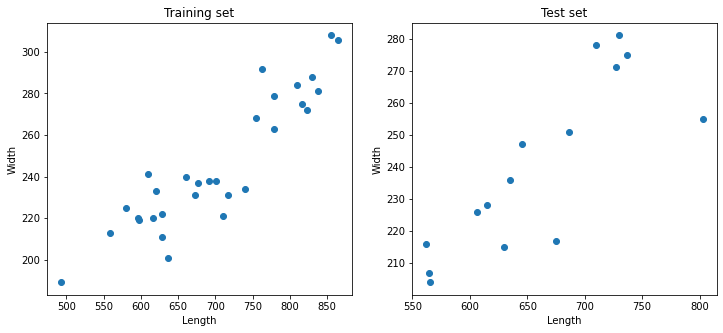

In [ ]:
# Train set
plt.figure(figsize=(12, 5))
plt.subplot(1,2,1)
plt.scatter(train_set_x, train_set_y)
plt.title("Training set")
plt.xlabel("Length")
plt.ylabel("Width")


# Test set

plt.subplot(1,2,2)
plt.scatter(test_set_x, test_set_y)
plt.title("Test set")
plt.xlabel("Length")
plt.ylabel("Width")


plt.show()

### Standardization
One common preprocessing step in machine learning is to center and standardize your dataset, meaning that you substract the mean of the whole numpy array from each example, and then divide each example by the standard deviation of the whole numpy array.

$$X_{new}= \frac{X - \mu}{\sigma}$$

Let's standardize our dataset.

In [ ]:
mean = np.concatenate([train_set_x,test_set_x]).mean()
std = np.concatenate([train_set_x,test_set_x]).std()

train_set_x = (train_set_x - mean) / std
test_set_x = (test_set_x - mean) / std

### Standardized data visualization

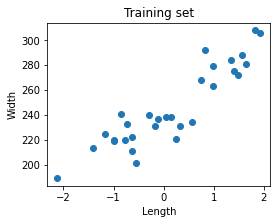

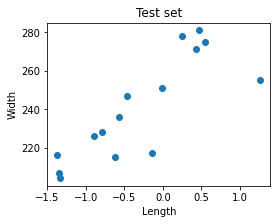

In [ ]:
plt.figure(figsize=(4, 3))
plt.scatter(train_set_x, train_set_y)
plt.title("Training set")
plt.xlabel("Length")
plt.ylabel("Width");

plt.figure(figsize=(4, 3))
plt.scatter(test_set_x, test_set_y)
plt.title("Test set")
plt.xlabel("Length")
plt.ylabel("Width");

## 3 - General Architecture of the learning algorithm ##

**Mathematical expression of the algorithm**:


For one example $x^{(i)}$:

$$h^{(i)} = \theta x^{(i)} + b\tag{1}$$
The cost is then computed by summing over all training examples:
$$J(\theta, b) = \frac{1}{2m}\sum_{i=1}^{m}(h^{(i)}- y^{(i)})^{2}\tag{2}$$ 

Now. we will carry out the following steps: 

    - Initialize the parameters of the model
    - Learn the parameters for the model by minimizing the cost  
    - Use the learned parameters to make predictions (on the test set)
    - Analyse the results and conclude

## 4 - Building the parts of our algorithm ## 

The main steps for building a learning algoritm:
1. Define the model structure (such as number of input features) 
2. Initialize the model's parameters
3. Loop:
    - Calculate current loss (forward propagation)
    - Calculate current gradient (backward propagation)
    - Update parameters (gradient descent)



### 4.1 - Initializing parameters

Let's implement parameter initialization in the cell below. We have to initialize 
$\theta$ as zero.

In [ ]:
# GRADED FUNCTION: initialize_with_zeros

def initialize_with_zeros():
    """
    This function initializes parameters theta and b as 0.
    
    Returns:
    theta -- initialized scalar parameter
    b -- initialized scalar (corresponds to the bias)
    """
    theta = 0
    b = 0

    assert(isinstance(theta, int))
    assert(isinstance(b, int))
    
    return theta, b

In [ ]:
theta, b = initialize_with_zeros()
print ("theta = " + str(theta))
print ("b = " + str(b))

theta = 0
b = 0


**Expected Output**: 

<table>
    <tr>
        <td>theta = 0</td>
    </tr>
    <tr>
        <td>b = 0</td>
    </tr>
</table>

### 4.2 - Forward and Backward propagation

Now that your parameters are initialized, you can do the "forward" and "backward" propagation steps for learning the parameters.

Forward Propagation:
- You get X
- You compute $H = (\theta X + b) = (h^{(1)}, h^{(2)}, ..., h^{(m-1)}, h^{(m)})$
- You calculate the cost function: $J(\theta, b) = \frac{1}{2m}\sum_{i=1}^{m}(h^{(i)} - y^{(i)})^{2}$


Here is the formula of gradient of the cost function: 

$$ \frac{\partial J}{\partial \theta} = \frac{1}{m}X(H-Y)^T\tag{3}$$
$$ \frac{\partial J}{\partial b} = \frac{1}{m} \sum_{i=1}^m (h^{(i)}-y^{(i)})\tag{4}$$


In [ ]:
def propagate(theta, b, X, Y):
    """
    Implement the cost function and its gradient for the propagation explained above

    Arguments:
    theta -- parameter, a scalar
    b -- bias, a scalar
    X -- features vector of size (number of examples, )
    Y -- results vector (number of examples, )

    Return:
    cost -- cost function for linear regression
    dt -- gradient of the loss with respect to theta, thus same shape as theta
    db -- gradient of the loss with respect to b, thus same shape as b
    """
    
    m = X.shape[0]
    
    # FORWARD PROPAGATION (FROM X TO COST)
    H = np.dot(X,theta) + b        # compute activation
    cost = np.sum(np.power((H - Y),2)) / (2*m)     # compute cost

    # BACKWARD PROPAGATION (TO FIND GRAD)
    dt = (np.dot((H - Y),X.T) / m)
    db = (np.sum((H - Y)) / m)

    assert(dt.dtype == float)
    assert(db.dtype == float)
    cost = np.squeeze(cost)
    assert(cost.shape == ())
    
    grads = {"dt": dt,
             "db": db}
    
    return grads, cost
    


In [ ]:
theta, b, X, Y = 1., 2., np.array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6]), np.array([2, 3, 4, 5, 6, 7])
grads, cost = propagate(theta, b, X, Y)
print ("dt = " + str(grads["dt"]))
print ("db = " + str(grads["db"]))
print ("cost = " + str(cost))


dt = -1.015
db = -2.15
cost = 3.4925


**Expected Output**:

<table>
    <tr>
        <td>dt = -1.015</td>
    </tr>
    <tr>
        <td>db = -2.15</td>
    </tr>
    <tr>
        <td>cost = 3.4925</td>
    </tr>
</table>

### 4.3 - Optimization
- We have initialized your parameters.
- We are also able to compute a cost function and its gradient.
- Now, We want to update the parameters using gradient descent.

The goal is to learn $\theta$ and $b$ by minimizing the cost function $J$. For a parameter $\theta$, the update rule is $ \theta = \theta - \alpha \text{ } \partial{}J$, where $\alpha$ is the learning rate.

In [ ]:
# GRADED FUNCTION: optimize

def optimize(theta, b, X, Y, num_iterations, learning_rate, print_cost=False):
    """
    This function optimizes theta and b by running a gradient descent algorithm
    
    Arguments:
    theta -- parameter, a scalar
    b -- bias, a scalar
    X -- features vector of shape (number of examples, )
    Y -- results vector of shape (number of examples, )
    num_iterations -- number of iterations of the optimization loop
    learning_rate -- learning rate of the gradient descent update rule
    print_cost -- True to print the loss every 100 steps
    
    Returns:
    params -- dictionary containing the weights theta and bias b
    grads -- dictionary containing the gradients of the weights and bias with respect to the cost function
    costs -- list of all the costs computed during the optimization, this will be used to plot the learning curve.
    """
    
    costs = []
    
    for i in range(num_iterations):
        
        
        # Cost and gradient calculation
        grads, cost = propagate(theta, b, X, Y)

        # Retrieve derivatives from grads
        dt = grads["dt"]
        db = grads["db"]
        # update rule
        theta =  theta  - (learning_rate * dt)
        b     =  b      - (learning_rate * db)
    
        # Record the costs
        if i % 100 == 0:
            costs.append(cost)
        
        # Print the cost every 100 training iterations
        if print_cost and i % 100 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
    
    params = {"theta": theta,
              "b": b}
    
    grads = {"dt": dt,
             "db": db}
    
    return params, grads, costs

In [ ]:
params, grads, costs = optimize(theta, b, X, Y, num_iterations=100, learning_rate=0.009, print_cost=False)
print ("theta = " + str(params["theta"]))
print ("b = " + str(params["b"]))
print ("dt = " + str(grads["dt"]))
print ("db = " + str(grads["db"]))


theta = 1.6451645666550938
b = 3.1951480476314393
dt = -0.5018556276988992
db = -0.7372605441640054


**Expected Output**: 

<table>
    <tr>
       <td>theta = 1.6451645666550938</td>
       <td>   </td>
    </tr>
    <tr>
       <td>b = 3.1951480476314393</td>
       <td>  </td>
    </tr>
    <tr>
       <td>dt = -0.5018556276988992</td>
       <td> </td>
    </tr>
    <tr>
       <td>db =  -0.7372605441640054</td>
       <td> </td>
    </tr>
</table>

 The previous function will output the learned $\theta$ and $b$. We are able to use $\theta$ and $b$ to predict the labels for a dataset X. Implement the `predict()` function. It must calculate $H = \theta X + b$.


In [ ]:
# GRADED FUNCTION: predict

def predict(theta, b, X):
    """
    Predict using learned linear regression parameters (theta, b)
    
    Arguments:
    theta -- parameter, a scalar
    b -- bias, a scalar
    X -- features vector of size (number of examples, )
    
    Returns:
    Y_prediction -- a numpy array (vector) containing all predictions for the examples in X
    """
    
    # Compute vector "Y_prediction" predicting the width of a kangoroo nasal
    Y_prediction = (X * theta) + b

    return Y_prediction

In [ ]:
theta = 0.1124579
b = -0.3
X = np.array([1., -1.1, -3.2, 1.2, 2., 0.1])
print ("predictions = " + str(predict(theta, b, X)))

predictions = [-0.1875421  -0.42370369 -0.65986528 -0.16505052 -0.0750842  -0.28875421]


**Expected Output**: 

<table>
    <tr>
         <td>
             predictions = [-0.1875421  -0.42370369 -0.65986528 -0.16505052 -0.0750842  -0.28875421]
         </td>
   </tr>
</table>


## 5 - Merge all functions into a model ##

Implement the model function. Use the following notation: 
    - Y_prediction_test for your predictions on the test set
    - Y_prediction_train for your predictions on the train set
    - theta, costs, grads for the outputs of optimize()

In [ ]:
# GRADED FUNCTION: model

def model(X_train, Y_train, X_test, Y_test, num_iterations=2000, learning_rate=0.5, print_cost=False):
    """
    Builds the linear regression model by calling the function you've implemented previously
    
    Arguments:
    X_train -- training set represented by a numpy array of shape (m_train, )
    Y_train -- training values represented by a numpy array (vector) of shape (m_train, )
    X_test -- test set represented by a numpy array of shape (m_test, )
    X_test -- test values represented by a numpy array (vector) of shape (m_test, )
    num_iterations -- hyperparameter representing the number of iterations to optimize the parameters
    learning_rate -- hyperparameter representing the learning rate used in the update rule of optimize()
    print_cost -- Set to true to print the cost every 100 iterations
    
    Returns:
    d -- dictionary containing information about the model.
    """
    
   
    # initialize parameters with zeros 
    theta, b = initialize_with_zeros()

    # Gradient descent
    parameters, grads, costs = optimize(theta, b, X_train, Y_train, num_iterations, learning_rate, print_cost)
    

    # Retrieve parameters w and b from dictionary "parameters"
    theta = parameters["theta"]
    b = parameters["b"]

    # Predict test/train set examples
    Y_prediction_test =  predict(theta,b,X_test)
    Y_prediction_train = predict(theta,b,X_train)

    # Print train/test Errors
    print ("Train RMSE: {} ".format(np.sqrt(np.mean((Y_prediction_train - Y_train) ** 2))))
    print ("Test RMSE: {} ".format(np.sqrt(np.mean((Y_prediction_test - Y_test) ** 2))))
    
    d = {"costs": costs,
         "Y_prediction_test": Y_prediction_test, 
         "Y_prediction_train" : Y_prediction_train, 
         "theta" : theta, 
         "b" : b,
         "learning_rate" : learning_rate,
         "num_iterations": num_iterations}
    
    return d

In [ ]:
d = model(train_set_x, train_set_y, test_set_x, test_set_y, num_iterations=500, learning_rate=0.05, print_cost=True)


Cost after iteration 0: 30753.266667
Cost after iteration 100: 89.390351
Cost after iteration 200: 87.787635
Cost after iteration 300: 87.787489
Cost after iteration 400: 87.787489
Train RMSE: 13.250470884220235 
Test RMSE: 16.20421532059726 


**Expected Output**: 

<table> 
    <tr>
        <td>Cost after iteration 0:  </td> 
        <td>30753.266667</td>
    </tr>
      <tr>
        <td> <center> $\vdots$ </center> </td> 
        <td> <center> $\vdots$ </center> </td> 
    </tr>  
    <tr>
        <td>Train RMSE:  </td> 
        <td>13.25047088422024 </td>
    </tr>
    <tr>
        <td>Test RMSE: </td> 
        <td> 16.20421532059726 </td>
    </tr>
</table> 

### Les't check the result

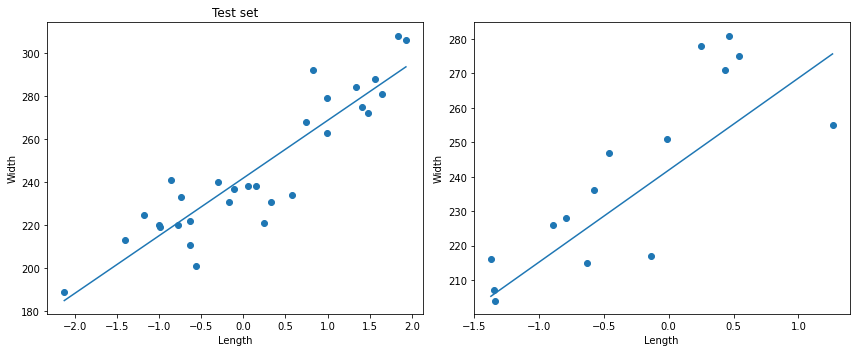

In [ ]:
# Training set
plt.figure(figsize=(12, 5))
plt.title("Training set")

plt.subplot(1,2,1)
plt.scatter(train_set_x, train_set_y)
x = np.array([min(train_set_x), max(train_set_x)])
theta = d["theta"]
b = d["b"]
y = theta * x + b
plt.plot(x, y)  
plt.axis("tight")
plt.xlabel("Length")
plt.ylabel("Width");
plt.tight_layout()


# Test set

plt.title("Test set")
plt.subplot(1,2,2)
plt.scatter(test_set_x, test_set_y)
x = np.array([min(test_set_x), max(test_set_x)])
theta = d["theta"]
b = d["b"]
y = theta * x + b
plt.plot(x, y)  
plt.axis("tight")
plt.xlabel("Length")
plt.ylabel("Width");
plt.tight_layout()

##### Linear Regression with one variable Done!